# XGBOOST

In [33]:
!pip install mkl
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
warnings.filterwarnings('ignore')
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cf_matrix

## PREPROCESSING

In [5]:
df=pd.read_csv('dataset.csv')

In [6]:
# Define the list of numerical and categorical columns
categorical_cols= ['Color', 'Source', 'Month']
numerical_cols  = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids',
       'Water Temperature', 'Air Temperature', 'Day', 'Time of Day',
       'Target']
# Separate numerical and categorical variables
numerical_data = df[numerical_cols]
categorical_data = df[categorical_cols]

In [7]:
# converting categorical data to numerical values

def convert_categorical_to_numeric(df, categorical_cols):
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    return df

df_encoded = convert_categorical_to_numeric(df, categorical_cols)

# Print the encoded values of the categorical columns
for col in categorical_cols:
    print(col, df_encoded[col].unique())
def replace_invalid_values_with_mean(df, numerical_cols):
    for col in numerical_cols:
        if df[col].dtype != np.number:
            continue
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
    return df

Color [0 1 2 3 4 5]
Source [8 2 4 1 5 6 0 3 7]
Month [ 4  9  0  6  7 11  8  5  1 10  2  3 12]


In [8]:
# Replacing null vaues

df.dropna(inplace=True)

In [9]:
# split your data into training and testing sets using train_test_split and applied feature scaling using StandardScaler

X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## XGBoost model 

In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [14]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999987121395869


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    665759
         1.0       1.00      1.00      1.00    266019

    accuracy                           1.00    931778
   macro avg       1.00      1.00      1.00    931778
weighted avg       1.00      1.00      1.00    931778



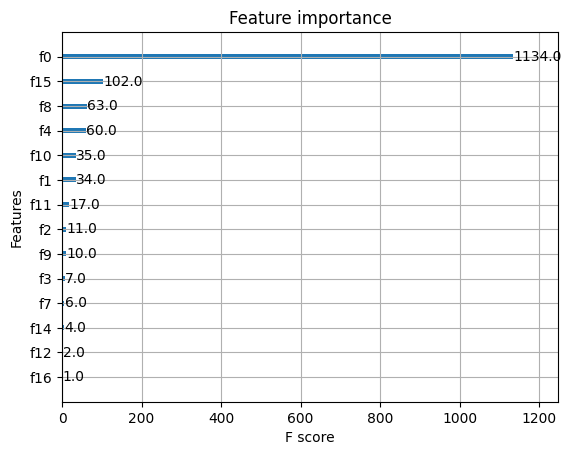

In [18]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()